In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

#loading data
df = pd.read_csv('emails.csv')  # Adjust path if needed for Colab uploads

#Using the entire dataset caused memory issues so I Sampled a manageable subset
df_subset = df.sample(n=1000, random_state=42)

#preparing features and labels
X = df_subset.drop(columns=["Email No.", "Prediction"])
y = df_subset["Prediction"]

#train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#train using logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

#Predicting test set
y_pred = model.predict(X_test)

#classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

#identifying misclassified samples
misclassified_indices = np.where(y_test != y_pred)[0]
misclassified_samples = X_test.iloc[misclassified_indices[:5]].copy()
misclassified_samples["True Label"] = y_test.iloc[misclassified_indices[:5]].values
misclassified_samples["Predicted Label"] = y_pred[misclassified_indices[:5]]

#displaying misclassified samples
print("\nFirst 5 Misclassified Samples:")
print(misclassified_samples.head())


Classification Report:

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       139
         1.0       0.94      0.97      0.95        61

    accuracy                           0.97       200
   macro avg       0.96      0.97      0.96       200
weighted avg       0.97      0.97      0.97       200


First 5 Misclassified Samples:
      the  to  ect  and  for  of    a  you  hou  in  ...  jay  valued  lay  \
1962    0   2    3    0    1   1   49    1    1   3  ...  0.0     0.0  0.0   
3281    0   0    1    0    0   0    2    0    0   0  ...  0.0     0.0  0.0   
1729   10   7    1    4    0   3   32    4    1  12  ...  0.0     0.0  0.0   
313     0   1    1    0    0   1    5    0    0   1  ...  0.0     0.0  0.0   
17     36  21    6   14    7  17  194   25    5  59  ...  0.0     0.0  0.0   

      infrastructure  military  allowing   ff  dry  True Label  \
1962             0.0       0.0       0.0  1.0  0.0         0.0   
3281            

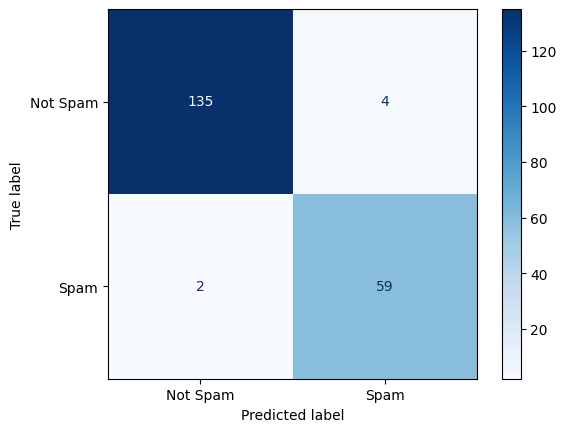

In [2]:
#confusion matrix + visualization
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Spam", "Spam"])
disp.plot(cmap='Blues')


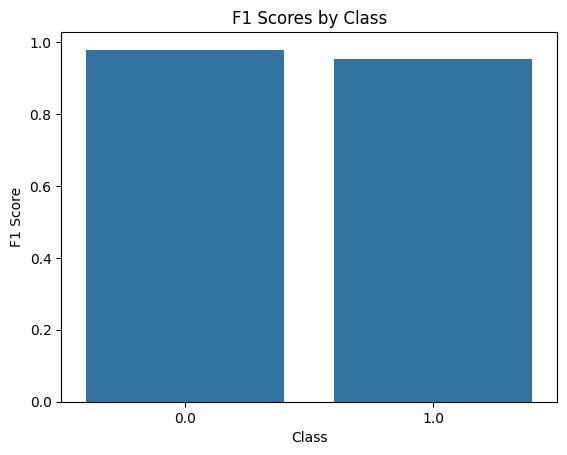

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

report_dict = classification_report(y_test, y_pred, output_dict=True)
metrics_df = pd.DataFrame(report_dict).transpose().drop(index=['accuracy', 'macro avg', 'weighted avg'])

sns.barplot(data=metrics_df[['precision', 'recall', 'f1-score']].reset_index(), x='index', y='f1-score')
plt.title("F1 Scores by Class")
plt.ylabel("F1 Score")
plt.xlabel("Class")
plt.show()
